*GitHub page of the [exercise](https://github.com/adam-srut/Ligand_Field.git "GitHub link").*

##### Load modules and function necessary for the workflow:

In [2]:
using WignerSymbols, SphericalHarmonics
using Plots; gr(); theme(:vibrant);
using Printf
using DataFrames
using LinearAlgebra
using Luxor
using LaTeXStrings
ENV["COLUMNS"]=200;
include("./LF_functions.jl");

# Ligand field theory

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;In this exercise you will construct a metal complex and compute the splitting of the d-orbitals in the electrostatic field of ligands. You will then compare qualitative results obtained from the ligand field theory with quantum chemical ($\textit{ab initio}$) calculations.
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;The ligand field theory is usually conceptualized as in the figure bellow. If a metal ion is put into a potential field of charged ligands the d-orbitals will first go higher in energy. Subsequently, the d-orbitals are split into two to five energy levels depending on the symmetry of the ligand field. In a case of octahedral ligand field, we obtain two new energy levels, the doubly degenerate e$_\mathrm{g}$ level and triply degenerate t$_\mathrm{2g}$ level. In the next section we will take a closer look to the origins of the splitting in the ligand field. As a result, a reader will be able to determine qualitatively the new energy levels of the d-orbitals only by specifying the ligand positions.
</div>

![splitting](splitting-example.png)

## Basic principles
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;First, let us begin with the necessary theory needed to understand the idea of the ligand field theory. We start with a metal ion in vacuum, we restrict ourselves only to the d-orbitals and ignore all other shells. The d-orbitals are the solution of the Schrödinger equation of the metal ion in vacuum. In spherical coordinates we can write the d-orbital with a magnetic quantum number $m$ as:  
<br><center>
\begin{equation}
    d_{m}(r,\theta,\phi) = R(r) \cdot Y^{m}_{l=2}(\theta,\phi)
\end{equation}
</center><br>
where $R(r)$ is the radial part and $Y^{m}_{l=2}(\theta,\phi)$ is the angular part in a form of a spherical harmonic. Now, lets add ligands around the metal ion. Ligands will be represented by point charges. The potential of the ligand field with $N_L$ ligands positioned at $\mathbf{R}_i$ with charge $q_i$ at a point $\mathbf{r}$ is:
<br><center>
\begin{equation}
    \hat{V}^\mathrm{LF}(\mathbf{r}) = \frac{e^2}{4\pi\epsilon_0}
    \sum\limits_{i=1}^{N_L} 
    \frac{q_i}{|\mathbf{R}_i - \mathbf{r}|}
\end{equation}
</center><br>
&nbsp;&nbsp;&nbsp;&nbsp;Under the action of the ligand field, the d-orbitals (defined in Eq. 1) are no longer a solution of the Schrödinger equation. The solution can be, however, obtained as a linear combination of the d-orbitals that has the lowest energy. The fact that the best wavefunction will have the lowest energy is called the $\textit{variational principle}$.
To find the best wavefunction with the lowest energy we have to solve the so-called secular equations. That is a set of $N$ coupled equations where $N$ is the number of basis functions. In our case $N$ is equal to 5, the basis functions are the d-orbitals with different magnetic quantum number $m_l = -l,\dots,l$ ($l=2$ for d-orbitals). The secular equation for a magnetic quantum number $m$ would have a form:
<center>
\begin{equation}
    \sum\limits_{m'=-2}^{2} c_{m'} \left( 
    \int\limits_0^\infty \int\limits_0^{\pi} \int\limits_0^{2\pi}
    ~d_{m'}^* \hat{V}^{LF} d_{m} ~ r^2\sin\theta\,\mathrm{d}\phi\mathrm{d}\theta\mathrm{d}r
    - \delta_{m',m}\epsilon \right)=0
\end{equation}
</center>
<center>
\begin{equation}
    \sum\limits_{m'=-2}^{2} c_{m'} \left( V_{m',m} - \delta_{m',m}\epsilon \right) = 0
\end{equation}
</center>
<br>
where $\epsilon$ is the energy, $\delta_{m,m'}$ is the Kronecker-delta and $c_{m'}$ are the expansion coefficients of the linear combination. The integral in Eq. 3 represents the action of the ligand field potential on the $d_m$ orbital, multiplied from the left by a complex conjugated $d_{m'}$ orbital and integrated over the whole space. These integrals are called the $\textit{resonance integrals}$. In Eq. 4 we substituted the resonance integral by term the $V_{m',m}$ to simplify the whole expression. Secular equations are a system of coupled equations due to the presence of the sum over $m'$, which means that they cannot be solved individually.
To find the solution lets write all equations in a matrix form:
</div>
<center>
\begin{equation}
    \begin{pmatrix} 
    V_{-2,-2}-\epsilon & V_{-2,-1} & V_{-2,0} & V_{-2,1} & V_{-2,2} \\
    V_{-1,-2} & V_{-1,-1}-\epsilon & V_{-1,0} & V_{-1,1} & V_{-1,2} \\
    V_{0,-2} & V_{0,-1} & V_{0,0}-\epsilon & V_{0,1} & V_{0,2} \\
    V_{1,-2} & V_{0,-1} & V_{1,0} & V_{1,1}-\epsilon & V_{1,2} \\
    V_{2,-2} & V_{2,-1} & V_{2,0} & V_{2,1} & V_{2,2}-\epsilon
    \end{pmatrix}
    \begin{pmatrix} c_{-2} \\ c_{-1} \\ c_0 \\ c_1 \\ c_2 \end{pmatrix} = 0
\end{equation}
</center>
<br>
<center>
\begin{equation}
    \left( \mathbf{V} - \mathbf{I}\epsilon \right) \mathbf{c} = 0
\end{equation}
</center>
<br>
<div style="text-align: justify">
Eq. 6 is only a compactly written Eq. 5, matrix $\mathbf{I}$ is the identity matrix. How can we then solve these equations? Linear algebra teaches us that the system of linear equations with the right-hand-side equal to $0$ will have a non-trivial solution ($\mathbf{c} \ne 0$) if and only if the determinant of the system (here the so-called $\textit{secular determinant}$) is zero:
<br><center>
\begin{equation}
    \det| \mathbf{V} - \mathbf{I}\epsilon | = 0
\end{equation}
</center><br>
this is an algebraic equation for unknown $\epsilon$. In our case, the left-hand-side of Eq. 7 will be a polynomial of the 5-th order which means that we are going to find 5 values of $\epsilon$ as a solution. These will be the new energies of the d-orbitals in the ligand field potential!
</div>
<br><br>
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Now, it is time to take a closer look to the resonance integrals that appeared in Eq. 3. If we want to construct and solve the secular equations we need to evaluate these integrals. This is not an easy task from a mathematical point of view. Luckily enough, analytical expressions for the resonance integrals can be found in the literature. We use an analytical expression from the book: $\textit{Electronic structure and properties of transition metal complexes}$ by Isaac Bersurker.
<center>
\begin{equation}
    V_{m',m} = \int\limits_0^\infty \int\limits_0^{\pi} \int\limits_0^{2\pi}
    ~d_{m'}^* \hat{V}^{LF} d_{m} ~ r^2\sin\theta\,\mathrm{d}\phi\mathrm{d}\theta\mathrm{d}r
\end{equation}
</center>
<br><center>
\begin{equation}
    V_{m',m} = 
    \sum\limits_{i=1}^{N_L} q_i \left[ 
    A_{m',m} F_4(R_i) Y_4^{m'-m}(\theta_i,\phi_i) + 
    B_{m',m} F_2(R_i) Y_2^{m'-m}(\theta_i,\phi_i) +
    C_{m',m} F_0(R_i) Y_0^{m'-m}(\theta_i,\phi_i) \right]
\end{equation}
</center><br>
&nbsp;&nbsp;&nbsp;&nbsp;At a first glance this seems to be a quite complicated expression, but there is nothing to be afraid of. Lets break down the integral in Eq. 9 into the individual terms. 
We notice that each ligand contributes to the integral with three terms (content of the braket), each of these terms consists of a tabulated constant ($A_{m',m}$, $B_{m',m}$ and $C_{m',m}$), Slater$-$Condon parameter (F$_4$, F$_2$ and F$_0$) and the so-called structure parameter which has a form a spherical harmonic.
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;The tabulated constants $A_{m',m}$, $B_{m',m}$ and $C_{m',m}$ arise from the angular part of the integral defined in Eq. 8, they were evaluated once for all and can be found in the literature.
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;The Slater$-$Condon parameters F$_4$, F$_2$ and F$_0$ comes from the radial part of the integral in Eq. 8. They depend on a distance of the ligand from the metal ion. They can be in principle evaluated to get the new energies of the d-orbitals, this would, however, lead to ultimately absurd numbers! The Slater$-$Condon parameters are not evaluted, the new energies of the d-orbitals are obtained as a function of these parameters and their values are then determined by comparison with an experiment of with an $\textit{ab initio}$ calculation.
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;The angular positions of the ligands ($\theta_i$ and $\phi_i$) are inserted via the structure parameters which have a form the spherical hamonics with angular quantum number equal to the index of the Slater$-$Condon parameter. That is $Y_l(\theta_i,\phi_i)$ where $l=0,2,4$. Lets take a closer look on the very last term in Eq. 9, the positions of the ligands enter here through $Y_0(\theta_i,\phi_i)$. An attentive reader might notice that $Y_0$ is actually the angular part of a s-orbital, which has a spherical symmetry. This means that regardless of the ligand position, the $Y_0(\theta_i,\phi_i)$ will always have the same value! This last term is then the spherical potential of the ligands which only lifts up the energy of the d-orbitals but does not cause any splitting. Terms responsible for the splitting are the first two in Eq. 9.
</div>

### Conclusion

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;And what is the take-away message for the reader? Lets recap the above part without any math. We started with a metal ion in vacuum, the solution of the Schrödinger equation was represented by 5 d-orbitals. Then, we added ligands around the metal ion as point charges. 
We tried to find a new solution of the Schrödinger equation with the potential of the ligands accounted in the Hamiltonian. To do that, we employed the variational principle (i.e. the best wavefunction has the lowest energy) which led to a system of secular equations. By solving these equations we obtained the new energy levels of the d-orbitals in the ligand field. 
In the secular equations we had to evaluate the resonance integrals, here we made a use of a prior work of chemists and physicists who already found the analytical expressions for these integrals. We have evaluated these integrals except for their radial part, which we treated as a parameter. These parameters can be later obtained from spectroscopic measurements or from $\textit{ab initio}$ calculations.     
</div>

# Example: Metal-ion in a square planar field
        
Bellow you will find the example use of this notebook demonstrated on a metal ion in a square planar field of equally charge equidistant ligands.

## Creating the complex:
The positions of ligands in spherical coordinates have to be specified in arrays `ligands_theta` and `ligands_phi`, we assume that the distance to the metal ion is the same for all the ligands.
    
Geometry of square planar complex is demonstrated bellow:

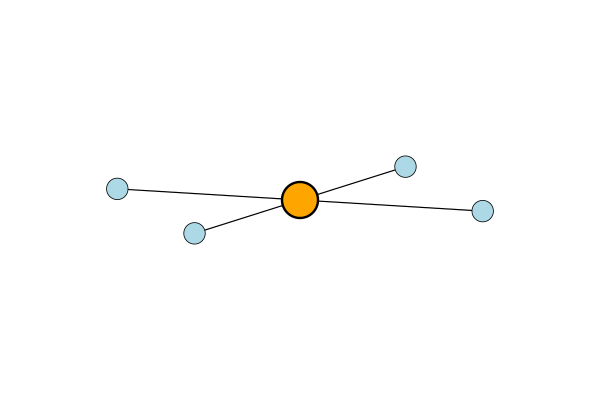

In [5]:
# ligands_theta = [ pi/4, pi/4, pi/4, pi/4, pi*3/4, pi*3/4, pi*3/4, pi*3/4 ];     # cuboid
# ligands_phi = [ pi/4, pi*3/4, pi*5/4, pi*7/4, pi/4, pi*3/4, pi*5/4, pi*7/4  ];  # cuboid
ligands_theta = [ pi/2, pi/2, pi/2, pi/2]   # Square planar
ligands_phi = [ 0 , pi/2, pi, pi*3/2 ]      # Square planar 
plot_ligs(ligands_theta, ligands_phi)

You can save the visualization of the complex with the `savefig` function:
</div>

In [3]:
#savefig("square-planar.png")

## Constructing the secular equations (matrix $\mathbf{V}$)
Function `construct_Htot` takes position of ligands as arguments and computes the matrix $\mathbf{V}$ defined in Eqs. 5 and 6.

You can also use function `construct_Htot_DF` which takes the same arguments and return matrix $\mathbf{V}$ in nicer format, this is, however, not suitable for exporting the notebook to pdf format.

In [4]:
#construct_Htot_DF(ligands_theta, ligands_phi) 
construct_Htot(ligands_theta, ligands_phi)

,d₋₂,d₋₁,d₀,d₁,d₂
,String,String,String,String,String
1,+4.00 F0+0.57 F2+0.07 F4,,,,+0.83 F4
2,,+4.00 F0-0.29 F2-0.29 F4,,,
3,,,+4.00 F0-0.57 F2+0.43 F4,,
4,,,,+4.00 F0-0.29 F2-0.29 F4,
5,+0.83 F4,,,,+4.00 F0+0.57 F2+0.07 F4


Function `do_splitting` will plot the energy the new energy levels of the d-orbitals. This is done by solving the secular equations.
The Slater$-$Condon parameters ($F_0$, $F_2$ and $F_4$) has to be provided as an input along with the ligand positions. Function also saves the image as `d-orb_splitting.png` file in the notebook directory.

*Absolute values of Slater$-$Condon parameters are arbitrary, do not use a large number so the new energies will be within the range of the plot. Parameter $F_0$ should not be larger than 0.3, parameters $F_2$ and $F_4$ should range between 0 and 4.*

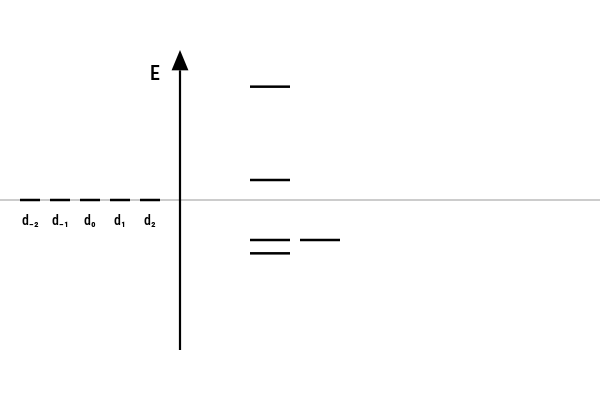

In [8]:
do_splitting(ligands_theta, ligands_phi, f0=0, f2=1, f4=2.5)

<p><div style="page-break-after:always;"></div></p>

# Studied problem

Complex [Cr(H$_2$O)$_6$]$^{3+}$ is an octahedral complex that has a green color in a water solution. We are going to inspect which transitions are responsible for the color and whether they are orbitally allowed or forbidden. To do so, you will use $\textit{ab inito}$ calculations and the ligand field theory.

## Exercise 1: Optical transitions in [Cr(H$_2$O)$_6$]$^{3+}$

In this exercise you will follow the protocol from the example case presented above. 

1. Prepare a metal-ion in an octahedral field
  - Determine the spherical coordinates of ligands in octahedral arrangement (define variables `ligands_theta` and `ligands_phi`).
2. Compute and discuss the properties of the $\mathbf{V}$ matrix
  - Use function `construct_Htot` or `construct_Htot_DF`.
  - Compute the splitting of the d-orbitals (function `do_splitting`)
  - Vary the values of Slater$-$Condon parameter to see their impact on the splitting.
  - Can you disentangle the shift of the d-orbitals to higher energies and their splitting just from the $\mathbf{V}$ matrix?
  - The $\mathbf{V}$ matrix is computed in the basis of d$_{-2}$, d$_{-1}$, d$_0$, d$_1$ and d$_2$ orbitals. What is the relation between these orbitals and orbitals d$_{z^2}$, d$_{xz}$, d$_{xy}$, d$_{yz}$ and d$_{x^2-y^2}$? 
  - Use the scheme obtained from the function `do_splitting` and fill the orbitals with electrons to get a configuration with the lowest energy.
    - Think also about all possible excited states.
3. Explore the effect of symmetry perturbation
  - Build a new complex with slightly perturbed octahedral symmetry.
  - Compute again the $\mathbf{V}$ matrix and the splitting of the d-orbitals.
  - Compare with the symmetric case and discuss the results.
4. Explain the optical transition
  - Identify the optical transition to the lowest excited state for symmetric and non-symmetric case.
  - Is this transition allowed or forbidden? Explain why!

###  Symmetric octahedral field 

In [6]:
# ligands_theta = [  ] 
# ligands_phi = [  ] 
# plot_ligs(ligands_theta, ligands_phi)

In [7]:
# construct_Htot(ligands_theta, ligands_phi)

In [8]:
# do_splitting(ligands_theta, ligands_phi, f0=, f2=, f4=)

### Distorted octahedral field 

In [9]:
# ligands_theta = [  ] 
# ligands_phi = [  ] 
# plot_ligs(ligands_theta, ligands_phi)

In [10]:
# construct_Htot(ligands_theta, ligands_phi)

In [11]:
# do_splitting(ligands_theta, ligands_phi, f0=, f2=, f4=)

## Exercise 2: Quantum chemical calculations

In this exercise you will carry out quantum chemistry calculations with software ORCA and inspect the output from these calculations. The input for the $\textit{ab initio}$ calculations is prepared in the directories: `Cr_octahedral`, `Cr_octahedral-distorted` and `Cr_tetrahedral`.

1. Solve the electronic structure of the [Cr(H$_2$O)$_6$]$^{3+}$ complex.
  - Inspect the input file in `Cr_octahedral` directory. Which concepts from the file are already familiar to you?
  - Run the calculation.
  - Find the excitation energies in the output file.
    - Look for a section entitled `ABSORPTION SPECTRUM`
  - Find and discuss the configurations of ground and excited states (guidelines are given bellow).
2. Repeat the previous point for distorted [Cr(H$_2$O)$_6$]$^{3+}$ complex.

To exploit the effects of the ligand field symmetry on the intensity of the optical transitions we switch from the octahedral to tetrahedral symmetry. In order to obtain a similar system (two orbital energy levels but only one is occupied) we will study a hypothetical tetrahedral [Cr(H$_2$O)$_4$]$^{4+}$ complex (think about why).

3. Repeat the first point for [Cr(H$_2$O)$_4$]$^{4+}$ complex.
  - Are the optical transitions here orbitally allowed?


### Configuration of an electronic state
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;When we construct a molecular orbital diagram, we subsequently fill it with electrons, configuration with the lowest energy has to satisfy the Pauli principle and the Hund rules. It may, however, also happen that two or more of these configurations will have a similar (or even the same) energy, in this case the system will be in a superposition of these configurations. This is the so-called $\textit{multi-reference}$ state, such states occur often in transition metal complexes. The usual way how to deal with multi-reference cases in quantum chemistry is the Complete Active Space (CAS) calculation. In this method instead of exploring all possible configurations of all electron in all orbitals, we rather choose much smaller (but chemically important) space and explore all possible configurations within this space (the so-called active space). 
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;Lets demonstrate the situation on the Cr$^{3+}$ ion. The configuration of this ion in vacuum is d$^3$ (3 electrons in the d-orbitals). Once we put this ion in the octahedral field the d-orbitals will split into two energy levels (t$_\mathrm{2g}$ and e$_\mathrm{g}$), the configuration with the lowest energy will be t$_\mathrm{2g}^3$e$_\mathrm{g}^0$ (3 electrons in t$_\mathrm{2g}$ and zero electrons in e$_\mathrm{g}$ level). But how the situation will look like if we perturb the octahedral geometry or if we are interested in the excited state? To answer question like these we can make use of the quantum chemical calculation.
</div>

<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;For the CAS calculation the active space will be intuitively chosen as 3 electrons in 5 d-orbitals. Once we run the CAS calculation using ORCA program the configurations of the ground and excited states along with their energies will be printed in the output file. We are looking for a section like this:
</div>


```
---------------------------------------------
CAS-SCF STATES FOR BLOCK  1 MULT= 4 NROOTS=10
---------------------------------------------

ROOT   0:  E=   -1498.7586708029 Eh
      1.00000 [     0]: 11100
ROOT   1:  E=   -1498.6949241217 Eh  1.735 eV  13990.8 cm**-1
      0.36677 [     2]: 11001
      0.26333 [     3]: 10110
      0.21567 [     1]: 11010
      0.10454 [     4]: 10101
```


the word `ROOT` is used for the electronic state. Header of this section then tells us that bellow we will find configurations and energies of 10 electronic states with the spin multiplicity 4. The energy is listed in Hartrees and for higher states also the excitation energy is listed in eV and cm$^{-1}$.
The configurations of the states are listed as an array of five numbers, they represent the d-orbitals ordered by their energy. So the configuration of the ground state (`ROOT 0`) given as `11100` means that 3 d-orbitals that has lowest energy contain one electron each. The remaining 2 d-orbitals with higher energy are unoccupied. We can immediately recognize the configuration t$_\mathrm{2g}^3$e$_\mathrm{g}^0$.
The first excited state (`ROOT 1`) is a multi-reference state, its configuration is t$_\mathrm{2g}^2$e$_\mathrm{g}^1$. Note, however, that such configuration can be achieved in multiple ways, one can choose from three different electrons and put it into two different orbitals. Orbital energies are listed in the output file just above this section, so the results can be easily compared to the results from the exercise 1.


#### Running the calculations

You can run the quantum chemistry calculation directly from the notebook. Use the example in the cell bellow. You only need to specify the directory in which the calculation will be done:

In [12]:
# cmd = "\$ORCADIR/orca single-point-calc.inp > single-point-calc.out"
# run(Cmd(`/bin/bash -c $cmd`, dir="Cr_octahedral"));

#### Excitation energies

The excitation energies are listed in the output file in the section entitled `ABSORPTION SPECTRUM`. You can print the content of this section directly from the notebook using a function `print_ExE`, the directory with the output file has to be specified.

In [15]:
#print_ExE("Cr_octahedral");

#### Orbital energies

Energies of the d-orbitals can be printed from the output file using a function `print_OrbE`, the directory with the output file has to be specified.

In [ ]:
#print_OrbE("Cr_octahedral");

### Octahedral complex [Cr(H$_2$O)$_6$]$^{3+}$

### Distorted complex [Cr(H$_2$O)$_6$]$^{3+}$

### Tetrahedral complex  [Cr(H$_2$O)$_4$]$^{4+}$

## Exercise 3: Summarizing the results

1. Which transitions between the d-orbitals are responsible for the color of the octahedral complex?
2. Why are the transitions in octahedral complex visible?
3. Compare the results for the octahedral complex with experimental data.
4. Use the generated images of the d-orbital splitting to schematically draw the transitions.
5. What would be the color of the tetrahedral complex?